<a href="https://colab.research.google.com/github/AlfonsoVasquezC/ComputervisionMNA/blob/main/7_2_Google_Colab_algoritmos_de_extracci%C3%B3n_de_caracter%C3%ADsticas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

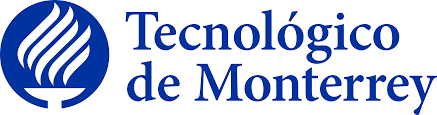

#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Visión computacional para imágenes y video**
###Tecnológico de Monterrey
###Dr. Gilberto Ochoa Ruiz

## 7.2 Google Colab algoritmos de extracción de características

**Por:**

* A01183284 RODRIGO RODRIGUEZ RODRIGUEZ
* A01793132 RIGOBERTO VEGA ESCUDERO
* A01016308 ALEXIS HERNANDEZ MARTINEZ
* A00820656 JUAN ALFONSO VASQUEZ CHAPOI
* A00759664 JOEL ORLANDO HERNANDEZ RAMOS

En el Collab de Harris Detector, se sugiere que se hagan pruebas con imágenes propias que el equipo decida usar. La idea  es escoger un objeto y tomar fotos con diferentes tipos de iluminación (bajo el sol, en un lugar oscuro) y bajo diferentes ángulos para analizar el comportamiento del detector de Harris bajo diferentes settings

# 7. Harris Edge & Corner Detection

## Table of Contents
1. [Libraries](#libraries)
2. [Color image to Grayscale conversion](#grayscale)
3. [Spatial derivative calculation](#spatial)
4. [Structure tensor setup](#tensor)
5. [Harris response calculation](#response)
6. [Find edges and corners using R](#find)

## Importing Libraries <a class="anchor" id="libraries" ></a>

In [137]:
import cv2
import matplotlib.pyplot as plt
from scipy import signal as sig
import numpy as np
from scipy.ndimage.filters import convolve
from skimage import io

## 1. Color to Grayscale <a class="anchor" id="grayscale" ></a>

In [138]:
url_chess = 'https://github.com/AlfonsoVasquezC/ComputervisionMNA/blob/main/data/chessboard.jpg?raw=true'

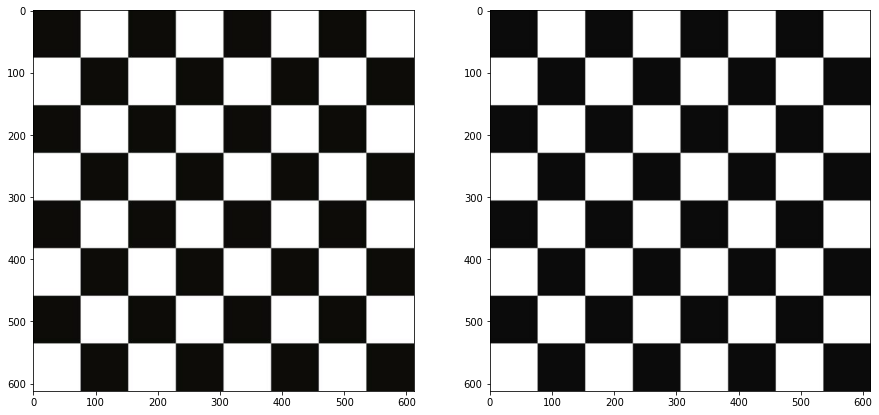

In [139]:
#img = cv2.imread('data/chessboard.jpg')
#img_color = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

img = io.imread(url_chess)
img_color = cv2.cvtColor(io.imread(url_chess), cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(io.imread(url_chess), cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.imshow(img_color)
plt.subplot(1, 2, 2)
plt.imshow(img_gray, cmap="gray")

## 2. Spatial derivative calculation <a class="anchor" id="spatial" ></a>

In [140]:
def gradient_x(imggray):
    ##Sobel operator kernels.
    kernel_x = np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]])
    return sig.convolve2d(imggray, kernel_x, mode='same')

def gradient_y(imggray):
    kernel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
    return sig.convolve2d(imggray, kernel_y, mode='same')

I_x = gradient_x(img_gray)
I_y = gradient_y(img_gray)

## 3. Structure tensor setup <a class="anchor" id="tensor" ></a>

In [141]:
def gaussian_kernel(size, sigma=1):
    size = int(size) // 2
    x, y = np.mgrid[-size:size+1, -size:size+1]
    normal = 1 / (2.0 * np.pi * sigma**2)
    g =  np.exp(-((x**2 + y**2) / (2.0*sigma**2))) * normal
    return g


Ixx = convolve(I_x**2, gaussian_kernel(3, 1))
Ixy = convolve(I_y*I_x, gaussian_kernel(3, 1))
Iyy = convolve(I_y**2, gaussian_kernel(3, 1))

## 4. Harris response calculation <a class="anchor" id="response" ></a>

In [142]:
k = 0.05

# determinant
detA = Ixx * Iyy - Ixy ** 2

# trace
traceA = Ixx + Iyy
    
harris_response = detA - k * traceA ** 2

In [143]:
img_gray.shape

(612, 612)

In [144]:
window_size = 3
offset = window_size//2
width, height = img_gray.shape

for y in range(offset, height-offset):
    for x in range(offset, width-offset):
        Sxx = np.sum(Ixx[y-offset:y+1+offset, x-offset:x+1+offset])
        Syy = np.sum(Iyy[y-offset:y+1+offset, x-offset:x+1+offset])
        Sxy = np.sum(Ixy[y-offset:y+1+offset, x-offset:x+1+offset])

In [145]:
#Find determinant and trace, use to get corner response
det = (Sxx * Syy) - (Sxy**2)
trace = Sxx + Syy
r = det - k*(trace**2)

## 5. Find edges and corners using R <a class="anchor" id="find" ></a>

In [146]:
img_copy_for_corners = np.copy(img)
img_copy_for_edges = np.copy(img)

for rowindex, response in enumerate(harris_response):
    for colindex, r in enumerate(response):
        if r > 0:
            # this is a corner
            img_copy_for_corners[rowindex, colindex] = [255,0,0]
        elif r < 0:
            # this is an edge
            img_copy_for_edges[rowindex, colindex] = [0,255,0]

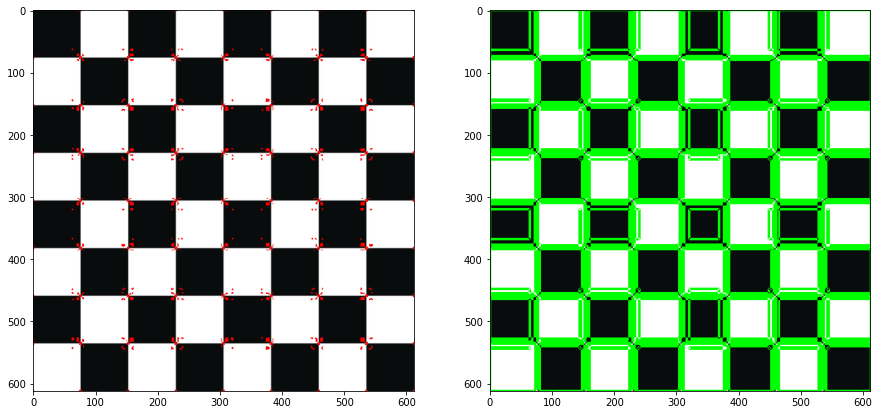

In [147]:
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.imshow(img_copy_for_corners, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(img_copy_for_edges, cmap="gray")

## Caso de equipo

In [148]:
url_front = 'https://github.com/AlfonsoVasquezC/ComputervisionMNA/blob/main/data/JM_Front.jpg?raw=true'
url_up = 'https://github.com/AlfonsoVasquezC/ComputervisionMNA/blob/main/data/JM_Up.jpg?raw=true'
url_sheer = 'https://github.com/AlfonsoVasquezC/ComputervisionMNA/blob/main/data/JM_Sheer.jpg?raw=true'
url_angle = 'https://github.com/AlfonsoVasquezC/ComputervisionMNA/blob/main/data/JM_Angle.jpg?raw=true'

In [149]:
url_list = [url_front, url_up, url_sheer, url_angle]

In [150]:
img_front = cv2.cvtColor(io.imread(url_front), cv2.COLOR_BGR2GRAY)
img_up = cv2.cvtColor(io.imread(url_up), cv2.COLOR_BGR2GRAY)
img_sheer = cv2.cvtColor(io.imread(url_sheer), cv2.COLOR_BGR2GRAY)
img_angle = cv2.cvtColor(io.imread(url_angle), cv2.COLOR_BGR2GRAY)

In [151]:
img_list = [img_front, img_up, img_sheer, img_angle]

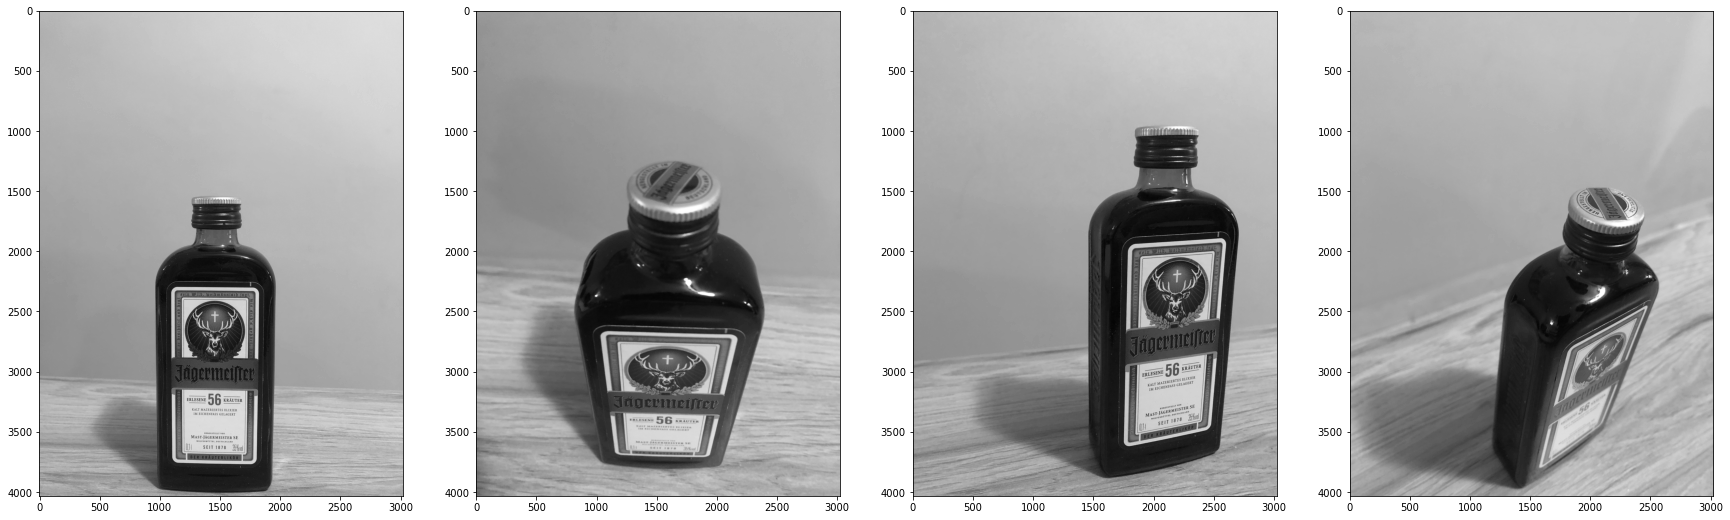

In [152]:
plt.figure(figsize=(30,10))

for i in range(len(url_list)):
  plt.subplot(1,4,i+1)
  plt.imshow(cv2.cvtColor(io.imread(url_list[i]), cv2.COLOR_BGR2GRAY), cmap = "gray")
  

In [153]:
def gradient_x(imggray):
    ##Sobel operator kernels.
    kernel_x = np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]])
    gradientx = sig.convolve2d(imggray, kernel_x, mode='same')
    return gradientx

def gradient_y(imggray):
    kernel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
    gradienty = sig.convolve2d(imggray, kernel_y, mode='same')
    return gradienty

def gaussian_kernel(size=3, sigma=1):
    size = int(size) // 2
    x, y = np.mgrid[-size:size+1, -size:size+1]
    normal = 1 / (2.0 * np.pi * sigma**2)
    gauss =  np.exp(-((x**2 + y**2) / (2.0*sigma**2))) * normal
    return gauss

def gradient_gaussian(imggray, size=3, sigma = 1):

  Ixx = convolve(gradient_x(imggray)**2, gaussian_kernel(size, sigma))
  Ixy = convolve(gradient_y(imggray)*gradient_x(imggray), gaussian_kernel(size, sigma))
  Iyy = convolve(gradient_y(imggray)**2, gaussian_kernel(size, sigma))

  return Ixx, Ixy, Iyy

In [154]:
gradient_x(img_front).shape

(4032, 3024)

In [155]:
gradient_y(img_front).shape

(4032, 3024)

In [156]:
gaussian_kernel(3,1)

array([[0.05854983, 0.09653235, 0.05854983],
       [0.09653235, 0.15915494, 0.09653235],
       [0.05854983, 0.09653235, 0.05854983]])

In [157]:
k = 0.05 #Alpha value of the Harris Formula

matrix = gradient_gaussian(img_front, 3, 1) #Result would be Ixx, Ixy and Iyy

# determinant
#detA = Ixx * Iyy - Ixy ** 2
detA = matrix[0] * matrix[2] - matrix[1]**2

# trace
#traceA = Ixx + Iyy
traceA = matrix[0] + matrix[2]
    
harris_response = detA - k * traceA ** 2

In [158]:
Ixx, Ixy, Iyy = gradient_gaussian(img_front, 3, 1)

### This part shows an explanation of how the kernel window covers the whole image

In [159]:
window_size = 3
offset = window_size//2
#width, height = img_front.shape # Error
height, width = img_front.shape

"""for y in range(offset, height-offset):
    for x in range(offset, width-offset):
        Sxx = np.sum(Ixx[y-offset:y+1+offset, x-offset:x+1+offset])
        Syy = np.sum(Iyy[y-offset:y+1+offset, x-offset:x+1+offset])
        Sxy = np.sum(Ixy[y-offset:y+1+offset, x-offset:x+1+offset])"""

'for y in range(offset, height-offset):\n    for x in range(offset, width-offset):\n        Sxx = np.sum(Ixx[y-offset:y+1+offset, x-offset:x+1+offset])\n        Syy = np.sum(Iyy[y-offset:y+1+offset, x-offset:x+1+offset])\n        Sxy = np.sum(Ixy[y-offset:y+1+offset, x-offset:x+1+offset])'

In [160]:
lasty = height-offset-1
lastx = width-offset-1

# last y and x are always substracted by 1 (and Offset)
# in the first part of the slicing you would get the offset substracted again, assuming last real y is 5000, the range gets until 4999 substracting the offset
# twice ensures being at 4997, the last window would get until 4997 leaving 3 pixels from the starting point until the real end (the size of the window).

# likewise the last part of the slicing should get until the real y end (5000), so we would need the slicing to reach until 5001 (5000 + 1).
# to achieve this the extend the last y in the range (4999) adding one offset (5000) plus the 1 needed to end in 5001

Sxx = np.sum(Ixx[lasty-offset:lasty+1+offset, lastx-offset:lastx+1+offset])
Syy = np.sum(Iyy[lasty-offset:lasty+1+offset, lastx-offset:lastx+1+offset])
Sxy = np.sum(Ixy[lasty-offset:lasty+1+offset, lastx-offset:lastx+1+offset])

In [161]:
#Find determinant and trace, use to get corner response
det = (Sxx * Syy) - (Sxy**2)
trace = Sxx + Syy
r = det - k*(trace**2)

### Finding Corners using R

In [162]:
harris_response[0].shape

(3024,)

In [163]:
harris_response.shape

(4032, 3024)

In [164]:
img_front = io.imread(url_front)

In [165]:
img_copy_for_corners = np.copy(img_front)
img_copy_for_edges = np.copy(img_front)

for rowindex, response in enumerate(harris_response):
    for colindex, r in enumerate(response):
        if r > 0:
            # this is a corner
            img_copy_for_corners[rowindex, colindex] = [255,0,0]
        elif r < 0:
            # this is an edge
            img_copy_for_edges[rowindex, colindex] = [0,255,0]

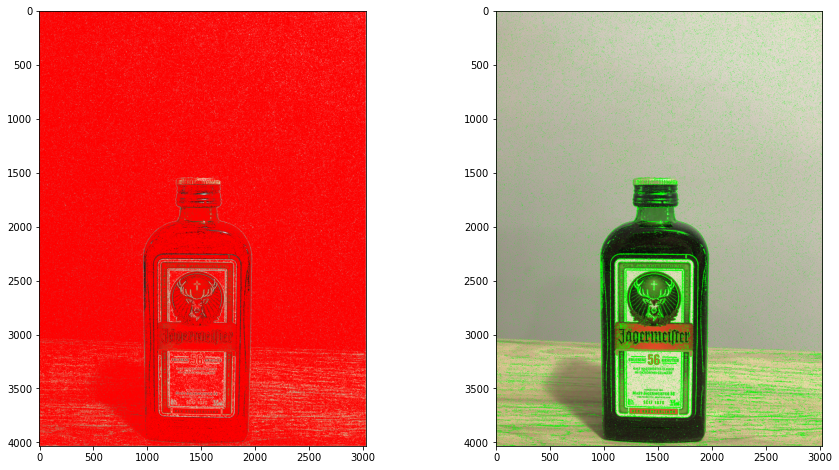

In [166]:
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.imshow(img_copy_for_corners, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(img_copy_for_edges, cmap="gray")

In [167]:
def analisis(imgoriginal, kernelgaussian=3, sigmagaussian=1, kvalue=0.05):

  #k = 0.05 #Alpha value of the Harris Formula
  img_gray = cv2.cvtColor(imgoriginal, cv2.COLOR_BGR2GRAY)

  matrix = gradient_gaussian(img_gray, kernelgaussian, sigmagaussian) # Result would be Ixx, Ixy and Iyy

  det = matrix[0] * matrix[2] - matrix[1]**2                          # determinant:  detA = Ixx * Iyy - Ixy ** 2

  trace = matrix[0] + matrix[2]                                       # trace :       traceA = Ixx + Iyy
    
  harris_response = det - kvalue * trace ** 2

  # Working with original image in order to be able to add the different colors
  img_copy_for_corners = np.copy(imgoriginal)
  img_copy_for_edges = np.copy(imgoriginal)

  for rowindex, response in enumerate(harris_response):
    for colindex, r in enumerate(response):
        if r > 0:
            # this is a corner
            img_copy_for_corners[rowindex, colindex] = [255,0,0]
        elif r < 0:
            # this is an edge
            img_copy_for_edges[rowindex, colindex] = [0,255,0]
          
  return img_copy_for_corners, img_copy_for_edges



In [168]:
img_front = io.imread(url_front)
img_up = io.imread(url_up)
img_sheer = io.imread(url_sheer)
img_angle = io.imread(url_angle)

img_color_list = [img_front, img_up, img_sheer, img_angle]

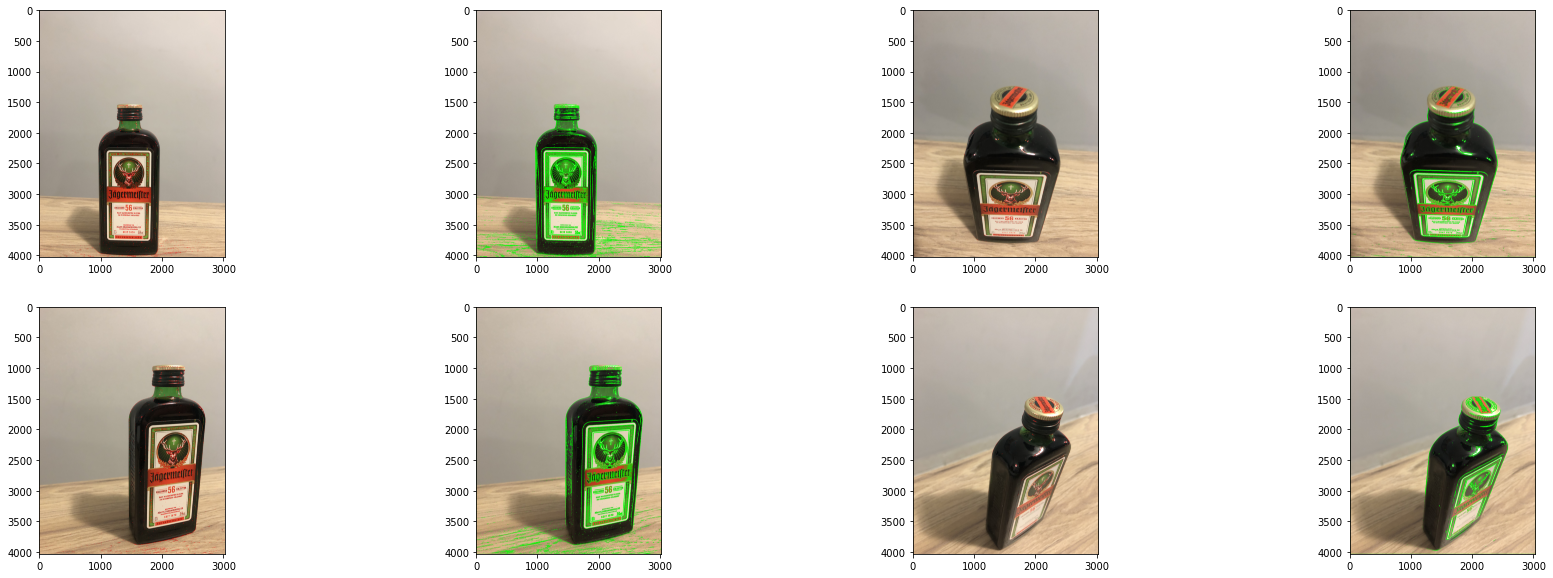

In [169]:
plt.figure(figsize=(30,10))
contador = 0

for i in range(len(img_color_list)):
  img_corners, img_edges = analisis(img_color_list[i], 3, 50, 0.05)

  
  
  j = i + 1 + contador
  k = i + 2 + contador

  contador += 1

  # j,k = 1,2
  # j,k = 2,3
  # j,k = 3,4

  #j,k = 1,2      0
  #j,k = 3,4      1
  #j,k = 5,6      2

  plt.subplot(2, 4, j)
  plt.imshow(img_corners, cmap="gray")

  plt.subplot(2, 4, k)
  plt.imshow(img_edges, cmap="gray")


### Analysis with Tresholding before Ixx, Ixy and Iyy analysis

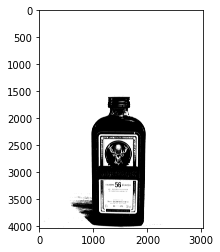

In [170]:
def tresholding(imgoriginal, treshold, highervalue, lowervalue):

  img_tresh = cv2.cvtColor(imgoriginal, cv2.COLOR_BGR2GRAY)

  height, width = img_tresh.shape

  for y in range(height):
    for x in range(width):
      if img_tresh[y,x] > treshold:
        img_tresh[y,x] = highervalue
      else:
        img_tresh[y,x] = lowervalue

  return img_tresh

img_tresh = tresholding(img_front, 100, 255, 1)
plt.imshow(img_tresh, cmap = "gray")


In [171]:
tresh_img_list_bgr = [cv2.cvtColor(tresholding(img_color_list[i], 100, 255, 1), cv2.COLOR_GRAY2BGR) for i in range(len(img_color_list))]



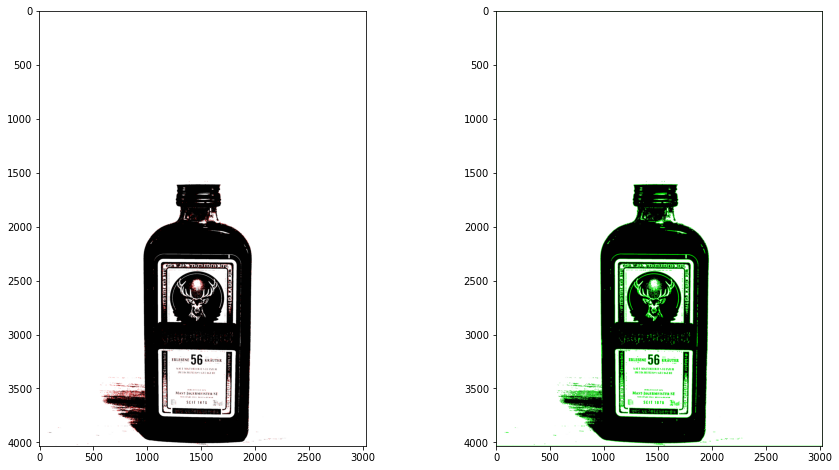

In [172]:
plt.figure(figsize=(15,8))
img_corners, img_edges = analisis(tresh_img_list_bgr[0], 3, 500, 0.15) #Trying a higher k value, Increasing sigma

plt.subplot(1, 2, 1)
plt.imshow(img_corners, cmap="gray")

plt.subplot(1, 2, 2)
plt.imshow(img_edges, cmap="gray")


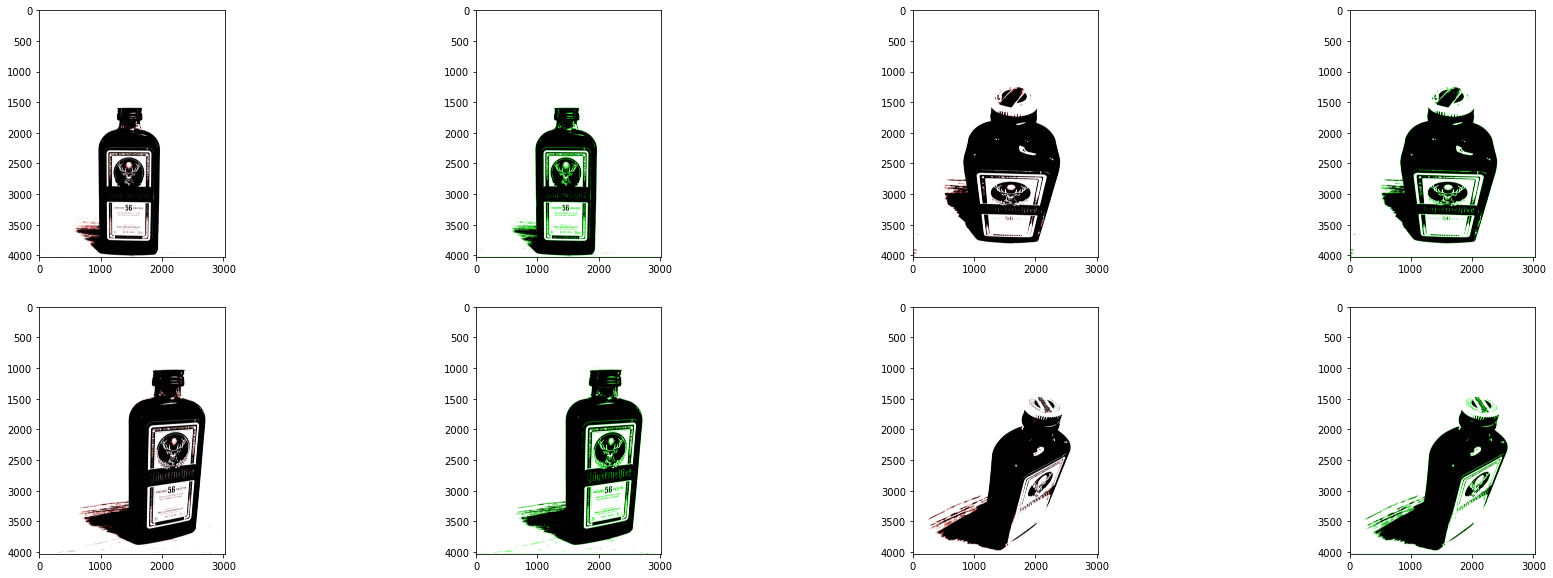

In [173]:
plt.figure(figsize=(30,10))
contador = 0

for i in range(len(tresh_img_list_bgr)):
  img_corners, img_edges = analisis(tresh_img_list_bgr[i], 3, 500, 0.15)
  
  
  j = i + 1 + contador
  k = i + 2 + contador

  contador += 1

  plt.subplot(2, 4, j)
  plt.imshow(img_corners, cmap="gray")

  plt.subplot(2, 4, k)
  plt.imshow(img_edges, cmap="gray")